<a href="https://colab.research.google.com/github/yashpatil1805/datasciencecodsoft/blob/main/movieratingprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='unicode_escape')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.head(1)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [ ]:
df['Year']=df['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [ ]:
df.head(1)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [ ]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [ ]:
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
df['Genre']=df['Genre'].str.split(',')

In [ ]:
df['Genre']

1                              [Drama]
3                   [Comedy,  Romance]
5           [Comedy,  Drama,  Musical]
6              [Drama,  Romance,  War]
8        [Horror,  Mystery,  Thriller]
                     ...              
15493                          [Drama]
15494    [Biography,  Drama,  History]
15503         [Action,  Crime,  Drama]
15505                 [Action,  Drama]
15508                 [Action,  Drama]
Name: Genre, Length: 5659, dtype: object

In [ ]:
df=df.explode('Genre')

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,Romance,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,War,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df['Genre']

1           Drama
3          Comedy
3         Romance
5          Comedy
5           Drama
           ...   
15503       Drama
15505      Action
15505       Drama
15508      Action
15508       Drama
Name: Genre, Length: 11979, dtype: object

In [ ]:
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)

In [ ]:
df['Votes']=pd.to_numeric(df['Votes'].str.replace(',',''))

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


(array([  16.,   28.,   44.,   45.,  156.,  220.,  306.,  335.,  520.,
         449.,  599.,  532.,  717.,  687.,  804.,  766., 1319., 1184.,
        1705., 1547.]),
 array([1931. , 1935.5, 1940. , 1944.5, 1949. , 1953.5, 1958. , 1962.5,
        1967. , 1971.5, 1976. , 1980.5, 1985. , 1989.5, 1994. , 1998.5,
        2003. , 2007.5, 2012. , 2016.5, 2021. ]),
 <BarContainer object of 20 artists>)

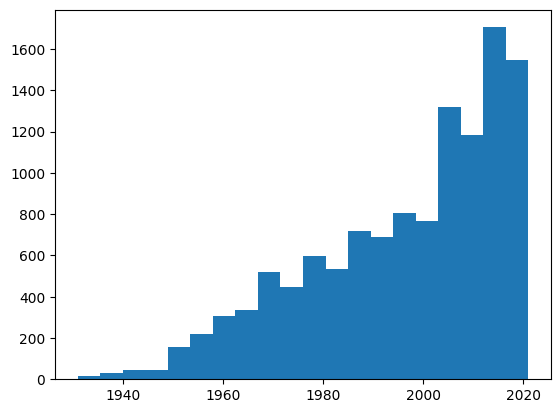

In [ ]:
plt.hist(data=df,x='Year',bins=20)

In [ ]:
px.histogram(df,x='Year',histnorm='probability density',nbins=30)


In [ ]:
avg_rating_by_year=df.groupby(['Year','Genre'])['Rating'].mean().reset_index()

In [ ]:
top_genres=df['Genre'].value_counts().head(10).index

In [ ]:
average_rating_by_year=avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

In [ ]:
fig=px.line(avg_rating_by_year,x='Year',y='Rating',color='Genre')

In [ ]:
fig.update_layout(title='Average Rating by Year for Top Genres',xaxis_title='Year',yaxis_title='Average Rating')

In [ ]:
px.histogram(df,x='Rating',histnorm='probability density',nbins=40)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
genre_mean_rating=df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating']=genre_mean_rating

In [ ]:
director_mean_rating=df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded']=director_mean_rating

In [ ]:
actor1_mean_rating=df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1_encoded']=actor1_mean_rating


In [ ]:
actor2_mean_rating=df.groupby('Actor 2')['Rating'].transform('mean')
df['actor2_encoded']=actor2_mean_rating
actor3_mean_rating=df.groupby('Actor 3')['Rating'].transform('mean')
df['actor3_encoded']=actor3_mean_rating

In [ ]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,actor1_encoded,actor2_encoded,actor3_encoded
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.248697,7.000000,6.850000,7.000000,7.000000
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.838423,4.400000,5.250000,4.400000,4.460000
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.838739,4.400000,5.250000,4.400000,4.460000
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.838423,5.335135,4.793617,5.730000,5.930000
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.875793,5.335135,4.793617,5.730000,5.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15503,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.875793,6.290476,6.377419,5.800000,6.018750
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.511985,5.175000,5.440845,4.603704,5.754545
15505,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.875793,5.175000,5.440845,4.603704,5.754545
15508,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.511985,4.090625,6.045128,5.632558,5.780000


In [ ]:
x=df[['Year','Votes','Duration','Genre_mean_rating','Director_encoded','actor1_encoded','actor2_encoded','actor3_encoded']]
y=df['Rating']


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)


In [ ]:
print('The performance evaluation od Logistic Regression is below: \n')
print('Mean Squared Error:',mean_squared_error(y_test,model_pred))
print('mean absolute error:',mean_absolute_error(y_test,model_pred))
print('r2 score ',r2_score(y_test,model_pred))

The performance evaluation od Logistic Regression is below: 

Mean Squared Error: 0.4463977880886115
mean absolute error: 0.4921055068501125
r2 score  0.7641906900948995


In [ ]:
x.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,actor1_encoded,actor2_encoded,actor3_encoded
1,2019,8,109,6.248697,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.838423,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.838739,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.838423,5.335135,4.793617,5.73,5.93
5,1997,827,147,5.875793,5.335135,4.793617,5.73,5.93


In [ ]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [ ]:
df['Predicted_Rating'] = model.predict(x)
df.head(5)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,actor1_encoded,actor2_encoded,actor3_encoded,Predicted_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.248697,7.000000,6.850000,7.00,7.00,7.243441
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.838423,4.400000,5.250000,4.40,4.46,4.109126
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.838739,4.400000,5.250000,4.40,4.46,4.109136
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.838423,5.335135,4.793617,5.73,5.93,5.394240
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.875793,5.335135,4.793617,5.73,5.93,5.395352
